#Loading the save numpy arrays in the previous **code**

In [1]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [11]:
%cd '/content/mount/MyDrive/CNN/Cat & dog classification'

/content/mount/MyDrive/CNN/Cat & dog classification


In [27]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy', allow_pickle=True)

#loading the save numpy arrays in the previous code
print(data.shape , target.shape)

(24946, 50, 50, 1) (24946, 2)


In [28]:
print(target)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


### Convolutional Neural Network Architecture

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout
#conv 2d use krnwa  black and white wlta
#colora images wlt 3d unath 2d wltath danna puluwan. no problem

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:])) #kernal size 3*3 and input shape means 50,50,1
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 256)       2560      
                                                                 
 activation_10 (Activation)  (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 128)       295040    
                                                                 
 activation_11 (Activation)  (None, 22, 22, 128)       0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 11, 11, 128)       0         
 ng2D)                                                

In [38]:
from sklearn.model_selection import train_test_split

# Split the data and target into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

### **Training the CNN for 10 epochs using train data**

In [40]:
history=model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=50,batch_size=32)

Epoch 1/50
624/624 [==============================] - 11s 18ms/step - loss: 0.4267 - accuracy: 0.8061 - val_loss: 0.4611 - val_accuracy: 0.7814
Epoch 2/50
624/624 [==============================] - 11s 17ms/step - loss: 0.4092 - accuracy: 0.8149 - val_loss: 0.4881 - val_accuracy: 0.7723
Epoch 3/50
624/624 [==============================] - 11s 18ms/step - loss: 0.3997 - accuracy: 0.8165 - val_loss: 0.4612 - val_accuracy: 0.7888
Epoch 4/50
624/624 [==============================] - 12s 19ms/step - loss: 0.3861 - accuracy: 0.8260 - val_loss: 0.4628 - val_accuracy: 0.7848
Epoch 5/50
624/624 [==============================] - 12s 19ms/step - loss: 0.3637 - accuracy: 0.8350 - val_loss: 0.4949 - val_accuracy: 0.7633
Epoch 6/50
624/624 [==============================] - 11s 18ms/step - loss: 0.3518 - accuracy: 0.8482 - val_loss: 0.4562 - val_accuracy: 0.7884
Epoch 7/50
624/624 [==============================] - 12s 18ms/step - loss: 0.3430 - accuracy: 0.8498 - val_loss: 0.4606 - val_accuracy:

In [41]:
print("Data shape:", data.shape)
print("Target shape:", target.shape)


Data shape: (24946, 50, 50, 1)
Target shape: (24946, 2)


### **Visualizing the loss and the accuracy of trained CNN**

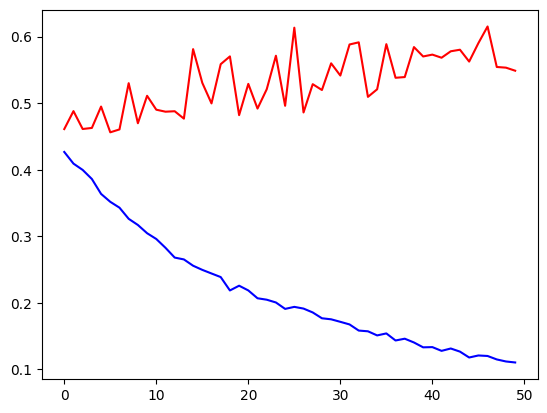

In [46]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

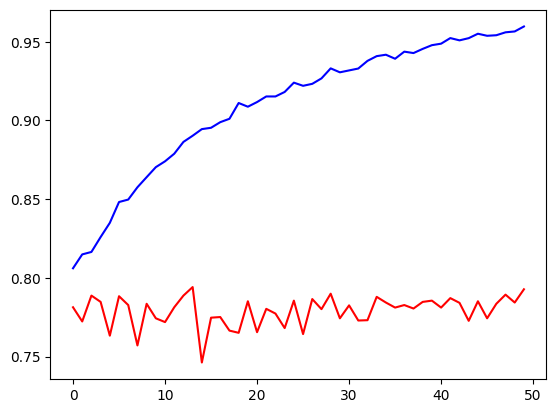

In [49]:
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')
#if not working replace 'accuracy' with 'acc'

### **Evaluating the CNN using testing_data**

This returns the loss and the accuracy of the Neural Network for Testing data

In [50]:
model.save_weights('cats&dogs_v1.h5')

In [51]:
model.save('CNN-Cat&Dog.model')